**Problem Statement**

The given data set is from the mining operation of heavy-duty trucks. Each row of the data is one full loading cycle.

Loading cycle involves truck travelling empty to loading tool, truck travelling loaded from loading tool to dumping area.

During each cycle we capture some key data such as fuel burned, total tones moved, total distance travelled empty and loaded, total stop time empty and loaded.

**Main Aim**

Predict the future production capacity for each truck (Prediction & forecasting needs to be made for next 15 days)

In [103]:
                                                                            #importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
df = pd.read_csv(r"C:\Users\Nirbhay\Downloads\Payload_trucks_final.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,Total_distance,Miles,Gear_shift_Miles
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193,454,711,3.6,648,610,2.8,5,77.600942,79,6.4,3.976774,19.865346
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323,99,177,0.6,56,1225,6.8,6,177.914355,73,7.4,4.598145,15.875966
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321,864,867,5.7,61,857,4.6,4,138.167531,100,10.3,6.400121,15.624704
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361,594,667,4.6,63,871,4.6,4,140.060237,99,9.2,5.716613,17.317946
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218,689,894,6.4,3725,1130,4.4,5,219.080709,103,10.8,6.710807,15.348378


In [5]:
#shape of dataset
print(f"Total No of Rows: {df.shape[0]} and Columns: {df.shape[1]}")

Total No of Rows: 14830 and Columns: 17


In [6]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14830 entries, 0 to 14829
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MACH_SER_NO       14830 non-null  object 
 1   OCUR_TS Date      14830 non-null  object 
 2   OCUR_TS Time      14830 non-null  object 
 3   PAYLD_WT          14830 non-null  float64
 4   LD_TM             14830 non-null  int64  
 5   EMTY_STOP_TM      14830 non-null  int64  
 6   EMTY_TRAV_TM      14830 non-null  int64  
 7   EMTY_TRAV_DSTNC   14830 non-null  float64
 8   LD_STOP_TM        14830 non-null  int64  
 9   LD_TRAV_TM        14830 non-null  int64  
 10  LD_TRAV_DSTNC     14830 non-null  float64
 11  LD_PASS_CT        14830 non-null  int64  
 12  FUEL_USED_IN_CYC  14830 non-null  float64
 13  SHFT_CT           14830 non-null  int64  
 14  Total_distance    14830 non-null  float64
 15  Miles             14830 non-null  float64
 16  Gear_shift_Miles  14830 non-null  float6

In [7]:
#checking the unique values
df.nunique()

MACH_SER_NO            20
OCUR_TS Date           32
OCUR_TS Time        13516
PAYLD_WT             1973
LD_TM                 445
EMTY_STOP_TM         1697
EMTY_TRAV_TM         1254
EMTY_TRAV_DSTNC        81
LD_STOP_TM           1395
LD_TRAV_TM           1384
LD_TRAV_DSTNC          74
LD_PASS_CT             10
FUEL_USED_IN_CYC      539
SHFT_CT               191
Total_distance        198
Miles                 210
Gear_shift_Miles     4726
dtype: int64

In [8]:
#Checking the null values

df.isnull().sum()

MACH_SER_NO         0
OCUR_TS Date        0
OCUR_TS Time        0
PAYLD_WT            0
LD_TM               0
EMTY_STOP_TM        0
EMTY_TRAV_TM        0
EMTY_TRAV_DSTNC     0
LD_STOP_TM          0
LD_TRAV_TM          0
LD_TRAV_DSTNC       0
LD_PASS_CT          0
FUEL_USED_IN_CYC    0
SHFT_CT             0
Total_distance      0
Miles               0
Gear_shift_Miles    0
dtype: int64

In [9]:
#Checking for Duplicates in the dataset

df.duplicated().sum()

0

In [10]:
df.columns

Index(['MACH_SER_NO', 'OCUR_TS Date', 'OCUR_TS Time', 'PAYLD_WT', 'LD_TM',
       'EMTY_STOP_TM', 'EMTY_TRAV_TM', 'EMTY_TRAV_DSTNC', 'LD_STOP_TM',
       'LD_TRAV_TM', 'LD_TRAV_DSTNC', 'LD_PASS_CT', 'FUEL_USED_IN_CYC',
       'SHFT_CT', 'Total_distance', 'Miles', 'Gear_shift_Miles'],
      dtype='object')

In [11]:
# Changing column names to lower case and removing unwanted spaces 
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['mach_ser_no', 'ocur_ts_date', 'ocur_ts_time', 'payld_wt', 'ld_tm',
       'emty_stop_tm', 'emty_trav_tm', 'emty_trav_dstnc', 'ld_stop_tm',
       'ld_trav_tm', 'ld_trav_dstnc', 'ld_pass_ct', 'fuel_used_in_cyc',
       'shft_ct', 'total_distance', 'miles', 'gear_shift_miles'],
      dtype='object')

#converting the coloumn type to datetime.

In [12]:
df['ocur_ts_date'].head()

0    22-Jul-16
1    22-Jul-16
2    22-Jul-16
3    22-Jul-16
4    22-Jul-16
Name: ocur_ts_date, dtype: object

In [13]:
df['ocur_ts_date'] = pd.to_datetime(df['ocur_ts_date'], errors = 'coerce')

In [14]:
df['ocur_ts_date'].head()

0   2016-07-22
1   2016-07-22
2   2016-07-22
3   2016-07-22
4   2016-07-22
Name: ocur_ts_date, dtype: datetime64[ns]

In [15]:
df['ocur_ts_time'].tail()

14825    11.13.10.000000000 PM
14826    11.37.52.000000000 PM
14827    12.03.29.000000000 AM
14828    12.27.45.000000000 AM
14829    01.21.13.000000000 AM
Name: ocur_ts_time, dtype: object

In [16]:
df['ocur_ts_time'] = df['ocur_ts_time'].astype(str)

# Convert to datetime format with 24-hour format
df['ocur_ts_time'] = pd.to_datetime(df['ocur_ts_time'], format='%I.%M.%S.%f %p')

In [17]:
df['ocur_ts_time'] = df['ocur_ts_time'].dt.strftime('%H:%M:%S')

In [18]:
df['ocur_ts_time'].tail()

14825    23:13:10
14826    23:37:52
14827    00:03:29
14828    00:27:45
14829    01:21:13
Name: ocur_ts_time, dtype: object

**Data visualization**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14830 entries, 0 to 14829
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   mach_ser_no       14830 non-null  object        
 1   ocur_ts_date      14830 non-null  datetime64[ns]
 2   ocur_ts_time      14830 non-null  object        
 3   payld_wt          14830 non-null  float64       
 4   ld_tm             14830 non-null  int64         
 5   emty_stop_tm      14830 non-null  int64         
 6   emty_trav_tm      14830 non-null  int64         
 7   emty_trav_dstnc   14830 non-null  float64       
 8   ld_stop_tm        14830 non-null  int64         
 9   ld_trav_tm        14830 non-null  int64         
 10  ld_trav_dstnc     14830 non-null  float64       
 11  ld_pass_ct        14830 non-null  int64         
 12  fuel_used_in_cyc  14830 non-null  float64       
 13  shft_ct           14830 non-null  int64         
 14  total_distance    1483

In [20]:
df.columns

Index(['mach_ser_no', 'ocur_ts_date', 'ocur_ts_time', 'payld_wt', 'ld_tm',
       'emty_stop_tm', 'emty_trav_tm', 'emty_trav_dstnc', 'ld_stop_tm',
       'ld_trav_tm', 'ld_trav_dstnc', 'ld_pass_ct', 'fuel_used_in_cyc',
       'shft_ct', 'total_distance', 'miles', 'gear_shift_miles'],
      dtype='object')

1.	Total tones moved by each truck as well as all the trucks combined.

In [21]:
total_tons_moved_by_truck = df.groupby('mach_ser_no')['payld_wt'].sum()
total_tons_moved_combined = df['payld_wt'].sum()

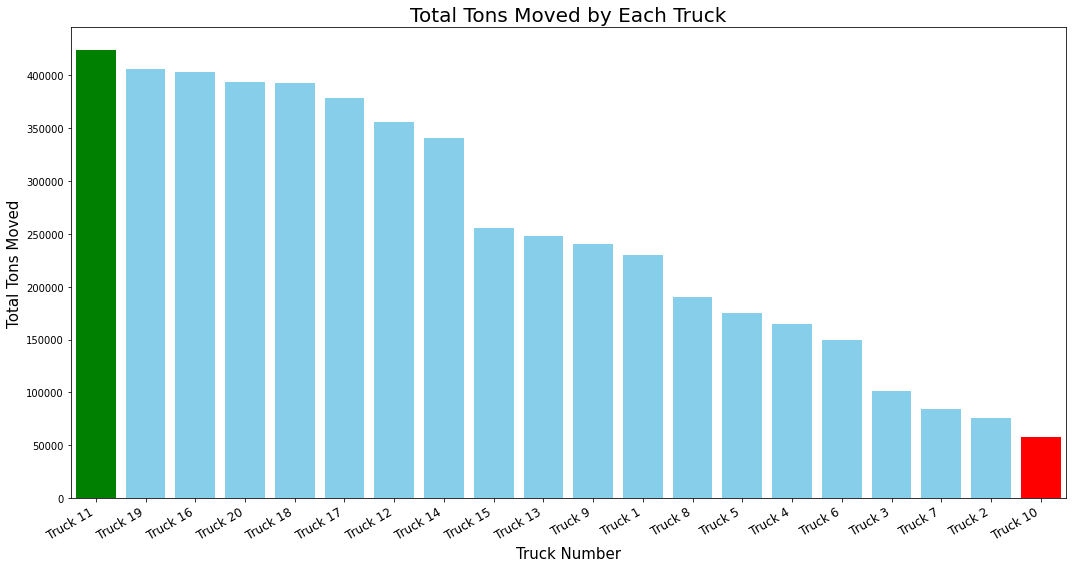

In [22]:
#Creating a bar plot to visualize the total tons moved by each truck

total_tons_moved_by_truck = total_tons_moved_by_truck.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
ax = total_tons_moved_by_truck.plot(kind='bar', color='skyblue')

#Highlighting highest and lowest bars with different colors
max_value = total_tons_moved_by_truck.max()
min_value = total_tons_moved_by_truck.min()
colors = ['g' if value == max_value else 'r' if value == min_value else 'skyblue' for value in total_tons_moved_by_truck.values]
ax.bar(total_tons_moved_by_truck.index, total_tons_moved_by_truck.values, color=colors)

plt.xlabel('Truck Number', fontsize=15)
plt.ylabel('Total Tons Moved', fontsize=15)
plt.title('Total Tons Moved by Each Truck', fontsize=20,)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
total_tons_moved_combined

5070599.699999999

In [24]:
print(max_value)
print(min_value)

424301.2
57807.9


Truck no 11 has moved the highest load with weight of 424301.2 tonnes

Truck no 10 has moved the least load with weight of 57807.9 tonnes

the total load moved by all the trucks is 5070599.7 tonnes

2. 	Average Tones moved per truck.

In [25]:
average_tons_per_truck = (total_tons_moved_combined / 20)   #there are total 20 trucks
print("The average tones moved per truck is = ",round(average_tons_per_truck))

The average tones moved per truck is =  253530


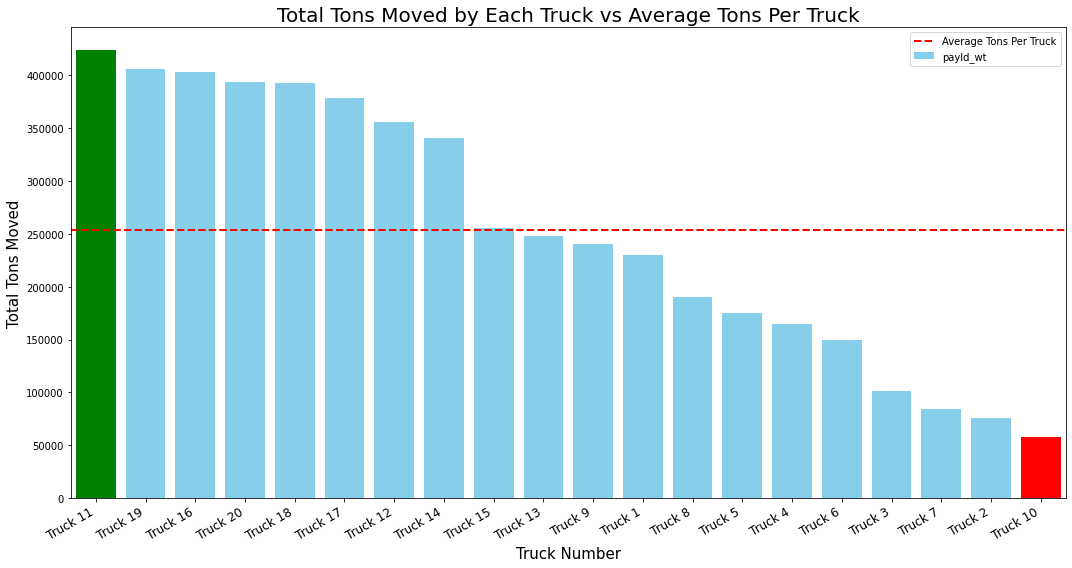

In [26]:
total_tons_moved_by_truck = total_tons_moved_by_truck.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
ax = total_tons_moved_by_truck.plot(kind='bar', color='skyblue')

#Highlighting highest and lowest bars with different colors
max_value = total_tons_moved_by_truck.max()
min_value = total_tons_moved_by_truck.min()
colors = ['g' if value == max_value else 'r' if value == min_value else 'skyblue' for value in total_tons_moved_by_truck.values]
ax.bar(total_tons_moved_by_truck.index, total_tons_moved_by_truck.values, color=colors)

plt.axhline(average_tons_per_truck, color='red', linestyle='--', linewidth=2, label='Average Tons Per Truck')

plt.xlabel('Truck Number', fontsize=15)
plt.ylabel('Total Tons Moved', fontsize=15)
plt.title('Total Tons Moved by Each Truck vs Average Tons Per Truck', fontsize=20,)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

#the graph shows how the trucks have carried the load comparing to the overall average.

#from this we can monitor the trucks that are carrying the load below the average 

3.  Tones per Gallon per distance travelled matrix for each truck and all trucks.

In [27]:
# electing the required columns from the dataframe
data = df[['mach_ser_no', 'payld_wt', 'fuel_used_in_cyc', 'total_distance']]

#Calculating Tons per Gallon per distance traveled for each truck
data['tons_per_gallon_per_distance'] = ((data['payld_wt'] / (data['fuel_used_in_cyc'] * 0.264172)) / data['total_distance'])

#In the formula above, we multiply 'fuel_used_in_cyc' by 0.264172 to convert liters to gallons

In [28]:
df = pd.concat([df, data['tons_per_gallon_per_distance']], axis=1)

In [29]:
df.tail()

,mach_ser_no,ocur_ts_date,ocur_ts_time,payld_wt,ld_tm,emty_stop_tm,emty_trav_tm,emty_trav_dstnc,ld_stop_tm,ld_trav_tm,ld_trav_dstnc,ld_pass_ct,fuel_used_in_cyc,shft_ct,total_distance,miles,gear_shift_miles,tons_per_gallon_per_distance
14825,Truck 20,2016-08-21,23:13:10,331.8,111,221,366,3.3,67,657,3.3,4,109.776943,72,6.6,4.101049,17.556485,1.733543
14826,Truck 20,2016-08-21,23:37:52,335.7,106,277,386,3.3,70,638,3.3,4,109.776943,65,6.6,4.101049,15.849605,1.753919
14827,Truck 20,2016-08-22,00:03:29,401.2,129,146,373,3.3,70,679,3.3,5,118.767296,57,6.6,4.101049,13.898884,1.937463
14828,Truck 20,2016-08-22,00:27:45,374.1,154,78,359,3.3,131,680,3.3,5,119.240472,64,6.6,4.101049,15.605765,1.799423
14829,Truck 20,2016-08-22,01:21:13,369.6,151,362,312,2.5,66,649,3.2,5,108.830590,59,5.7,3.541815,16.658127,2.255378


In [30]:
average_value = np.mean(df['tons_per_gallon_per_distance'][~np.isinf(df['tons_per_gallon_per_distance'])])
print("Average value:", average_value)

Average value: 2.621035301929016


Tones per Gallon per distance travelled matrix for each truck is added in the dataframe 

The average of Tones per Gallon per distance of all trucks is 2.62

4.	Which truck is running most efficient and which truck is running most inefficient as per as the matrix in item number 3?

In [33]:
#Grouping the data by 'mach_ser_no' and calculate the average 'tons_per_gallon_per_distance'
average_tpgd_by_truck = data.groupby('mach_ser_no')['tons_per_gallon_per_distance'].mean()

#Finding the truck with the minimum average 'tons_per_gallon_per_distance' value (most efficient)
most_efficient_truck = average_tpgd_by_truck.idxmin()

#Finding the truck with the maximum average 'tons_per_gallon_per_distance' value (most inefficient)
most_inefficient_truck = average_tpgd_by_truck.idxmax()

print("Most Efficient Truck: ", most_efficient_truck)
print("Most Inefficient Truck: ", most_inefficient_truck)


Most Efficient Truck:  Truck 10
Most Inefficient Truck:  Truck 19


5.	Show Visually which truck has travelled empty most distance.

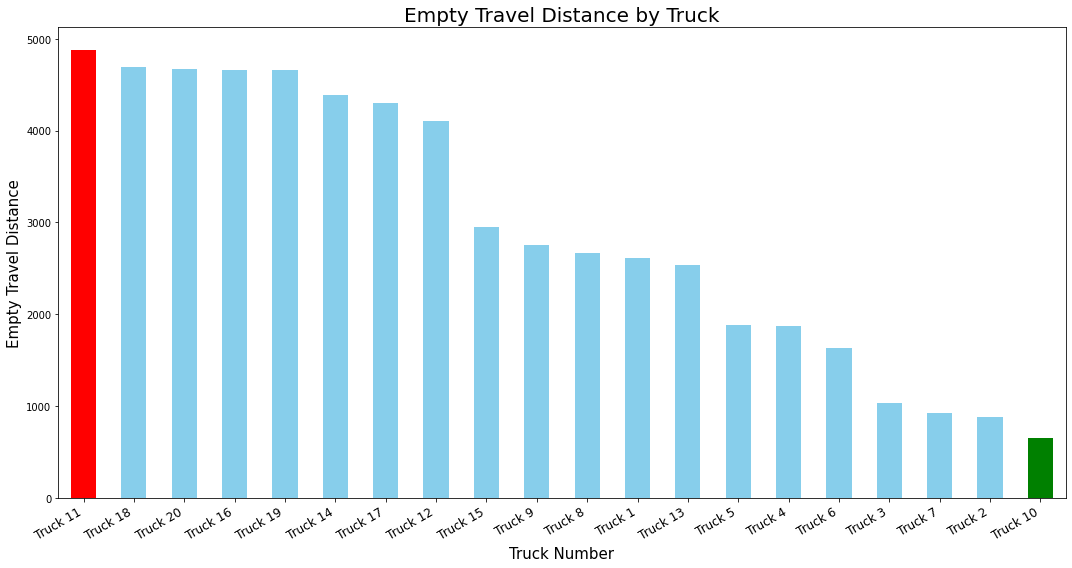

In [48]:
import matplotlib.pyplot as plt

#Grouping the data by truck number and calculate the sum of 'emty_trav_dstnc' for each truck
empty_distance_by_truck = df.groupby('mach_ser_no')['emty_trav_dstnc'].sum()
empty_distance_by_truck = empty_distance_by_truck.sort_values(ascending=False)

#Finding the truck with the minimum empty travel distance
min_distance_truck = empty_distance_by_truck.idxmin()
max_distance_truck = empty_distance_by_truck.idxmax()

plt.figure(figsize=(15, 8))
empty_distance_by_truck.plot(kind='bar', color=['green' if truck == min_distance_truck else 'red' if truck == max_distance_truck else 'skyblue' for truck in empty_distance_by_truck.index])
plt.xlabel('Truck Number', fontsize=15)
plt.ylabel('Empty Travel Distance', fontsize=15)
plt.title('Empty Travel Distance by Truck', fontsize=20)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


Truck no 11 has travelled empty for the most distance.

6.	Show visually which truck has Max and Min Gear Shifts per Mile

In [65]:
df['gear_shifts_per_mile'] = df['gear_shift_miles'] / df['miles']

In [66]:
avg_gear_shifts = df.groupby('mach_ser_no')['gear_shifts_per_mile'].mean()

In [71]:
#Finding the truck with the highest and lowest gear shifts per mile
highest_shifts_truck = avg_gear_shifts.idxmax()
lowest_shifts_truck = avg_gear_shifts.idxmin()

print("The highest gear shift per mile is %s and lowest gear shift per mile is %s"%(highest_shifts_truck,lowest_shifts_truck))

The highest gear shift per mile is Truck 19 and lowest gear shift per mile is Truck 10


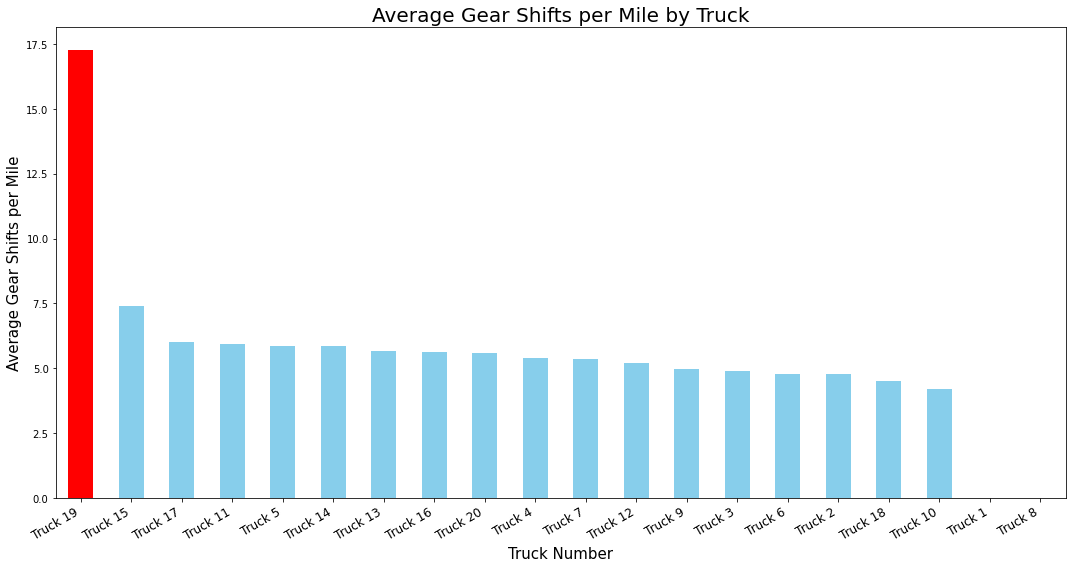

In [68]:
avg_gear_shifts = avg_gear_shifts.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
avg_gear_shifts.plot(kind='bar', color=['green' if truck == min_distance_truck else 'red' if truck == max_distance_truck else 'skyblue' for truck in empty_distance_by_truck.index])
plt.xlabel('Truck Number', fontsize=15)
plt.ylabel('Average Gear Shifts per Mile', fontsize=15)
plt.title('Average Gear Shifts per Mile by Truck', fontsize=20)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

We can clearly see why truck no 19 is the least efficient truck as its having the highest gear shift

7.	Which truck has max stop time in empty

In [72]:
total_stop_time_empty = df.groupby('mach_ser_no')['emty_stop_tm'].sum()

In [73]:
max_stop_time_truck = total_stop_time_empty.idxmax()
print("Truck with the maximum stop time in empty:", max_stop_time_truck)

Truck with the maximum stop time in empty: Truck 9


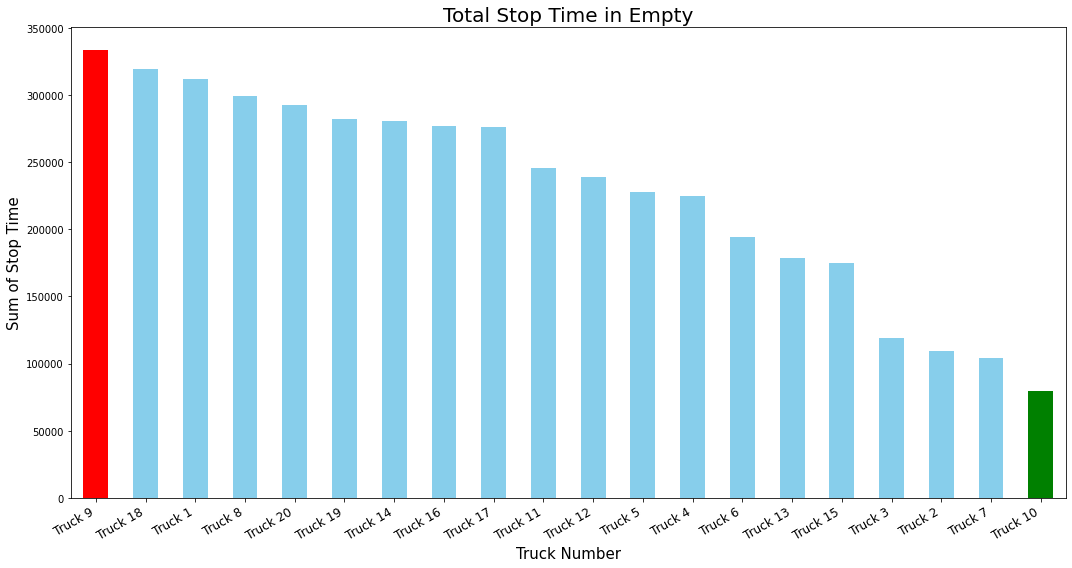

In [75]:
total_stop_time_empty = total_stop_time_empty.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
total_stop_time_empty.plot(kind='bar', color=['green' if truck == min_distance_truck else 'red' if truck == max_distance_truck else 'skyblue' for truck in empty_distance_by_truck.index])
plt.xlabel('Truck Number', fontsize=15)
plt.ylabel('Sum of Stop Time', fontsize=15)
plt.title('Total Stop Time in Empty', fontsize=20)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

8.	Total distance travelled by each truck as well as all trucks combined.

In [77]:
total_distance_by_truck = df.groupby('mach_ser_no')['total_distance'].sum()

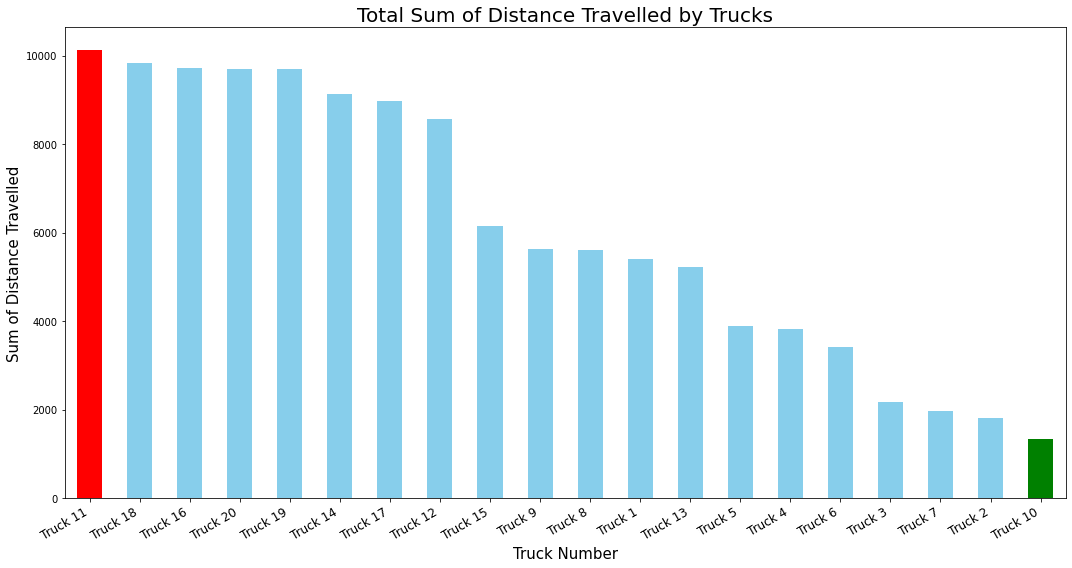

In [78]:
total_distance_by_truck = total_distance_by_truck.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
total_distance_by_truck.plot(kind='bar', color=['green' if truck == min_distance_truck else 'red' if truck == max_distance_truck else 'skyblue' for truck in empty_distance_by_truck.index])
plt.xlabel('Truck Number', fontsize=15)
plt.ylabel('Sum of Distance Travelled', fontsize=15)
plt.title('Total Sum of Distance Travelled by Trucks', fontsize=20)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [82]:
total_distance_combined = total_distance_by_truck.sum()
print("The total distance travelled by whole trucks combined in km is : ",total_distance_combined)

The total distance travelled by whole trucks combined in km is :  122219.1


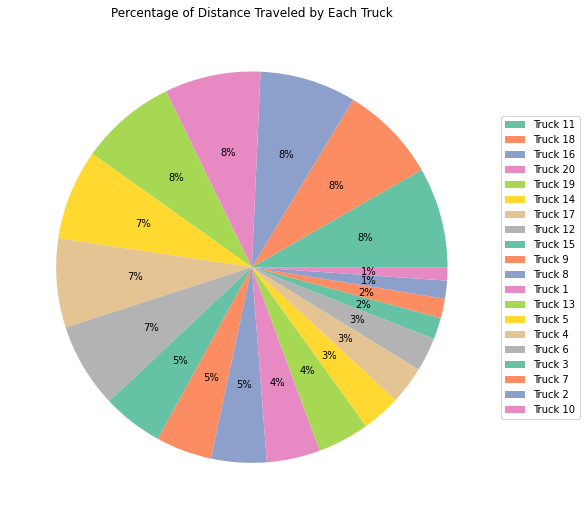

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of distance traveled by each truck
percentage_distance_by_truck = (total_distance_by_truck / total_distance_combined) * 100

# Filter trucks with distance less than 30 and assign colors from Set2 palette
idx = percentage_distance_by_truck[percentage_distance_by_truck.lt(30)].index
colors = sns.color_palette('Set2')

# Plotting the pie chart
plt.figure(figsize=(9, 9))
percentage_distance_by_truck.plot.pie(title='Percentage of Distance Traveled by Each Truck', legend=True, autopct='%1.0f%%', labeldistance=None, colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('')  # Remove ylabel to avoid overlapping
plt.show()


We can see that truck no 11, 18, 16 and 20 has travelled more

Other Analysis and Visualizations by me

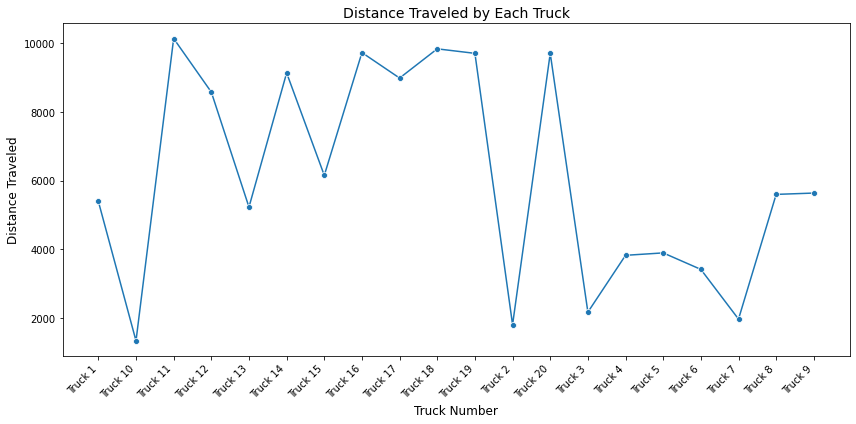

In [93]:
distance_traveled_by_truck = df.groupby('mach_ser_no')['total_distance'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='mach_ser_no', y='total_distance', data=distance_traveled_by_truck, marker='o')
plt.xlabel('Truck Number', fontsize=12)
plt.ylabel('Distance Traveled', fontsize=12)
plt.title('Distance Traveled by Each Truck', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

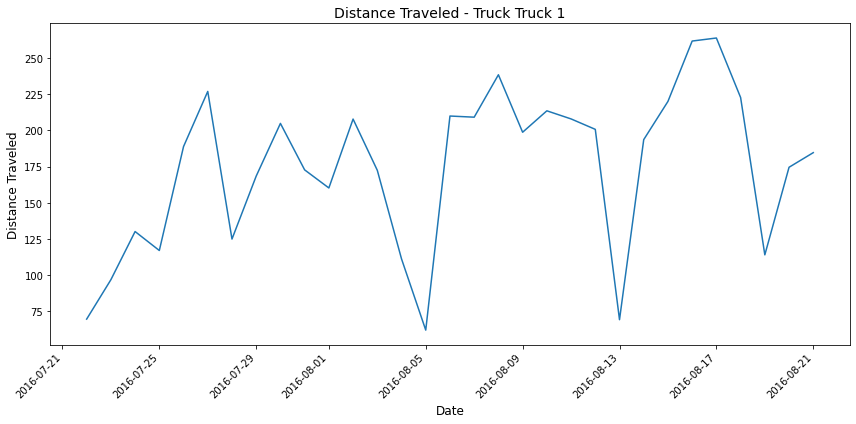

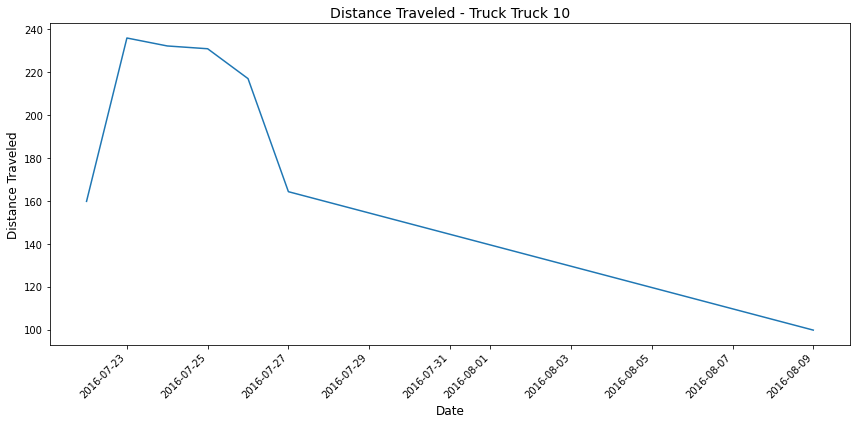

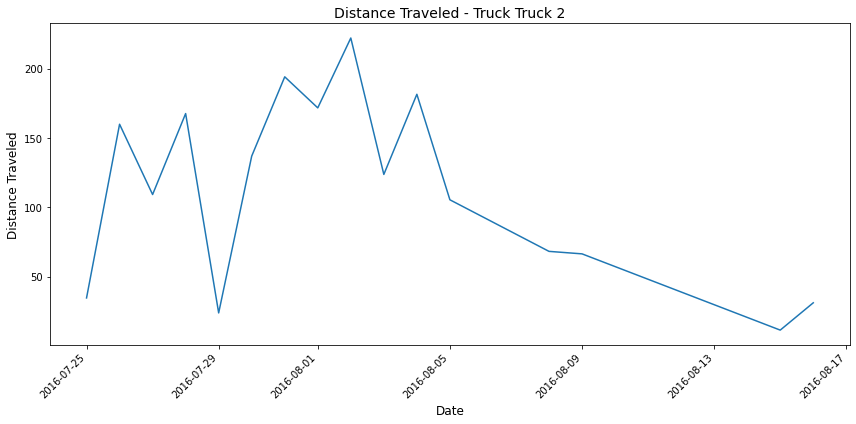

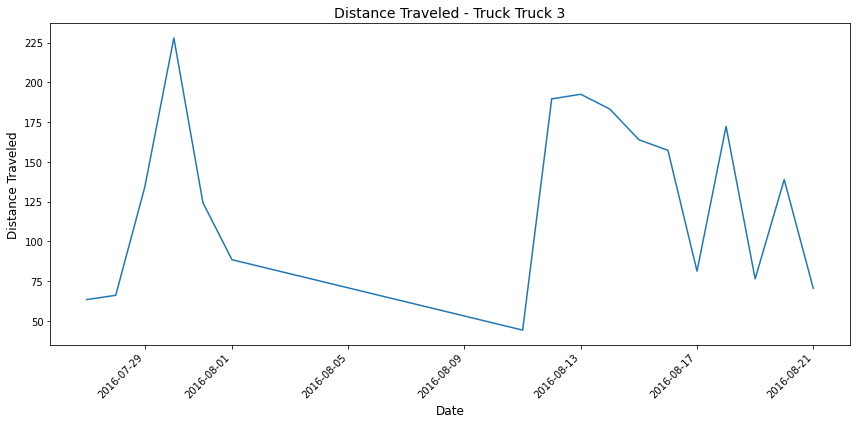

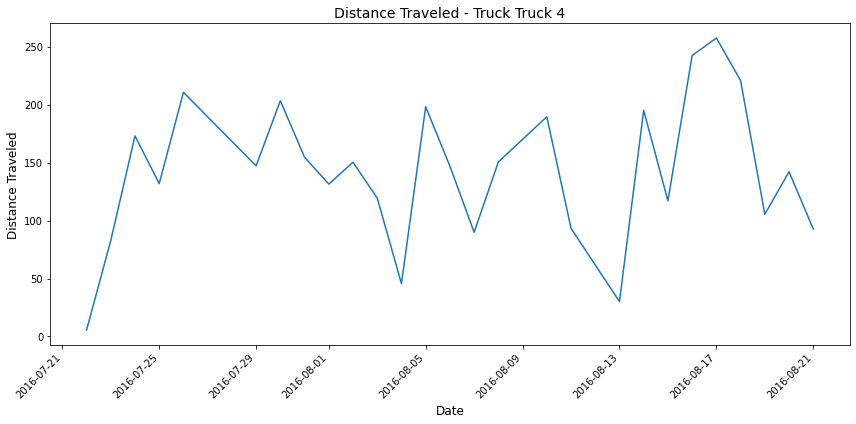

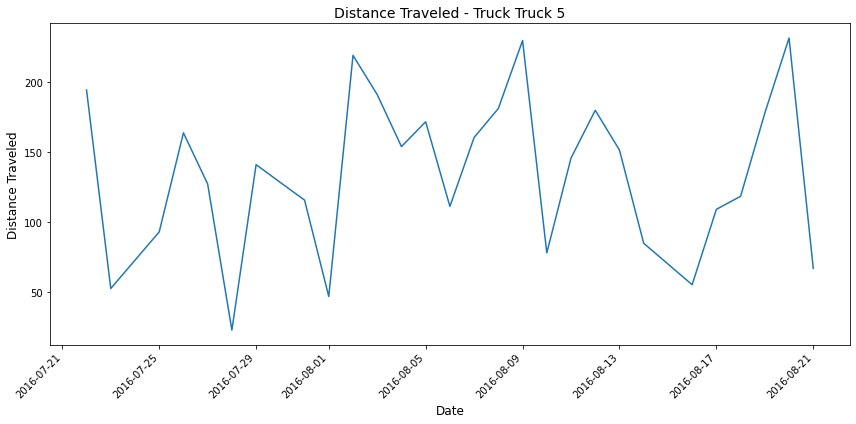

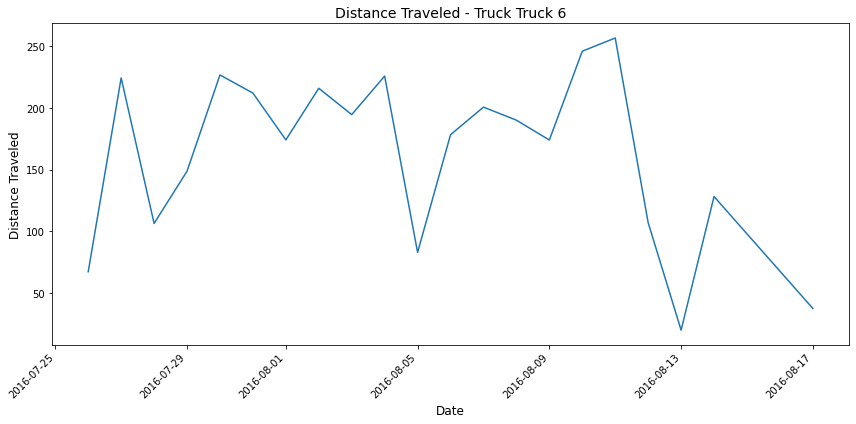

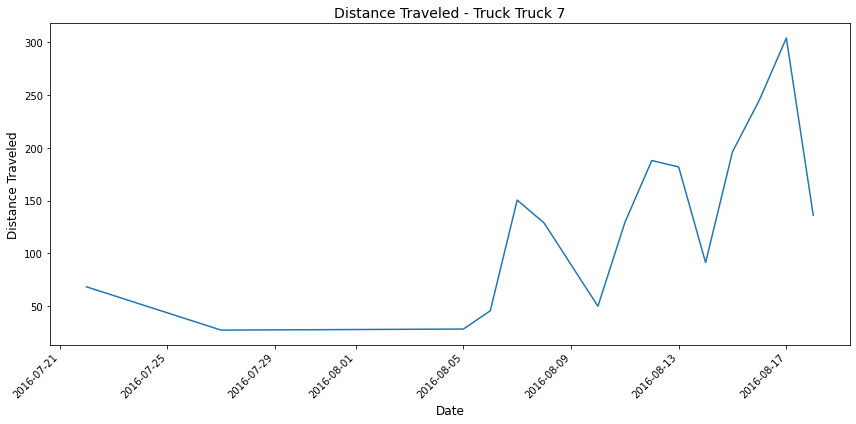

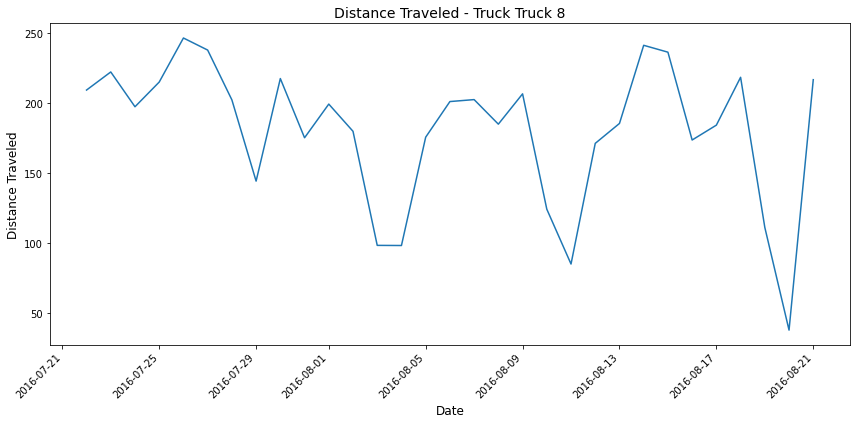

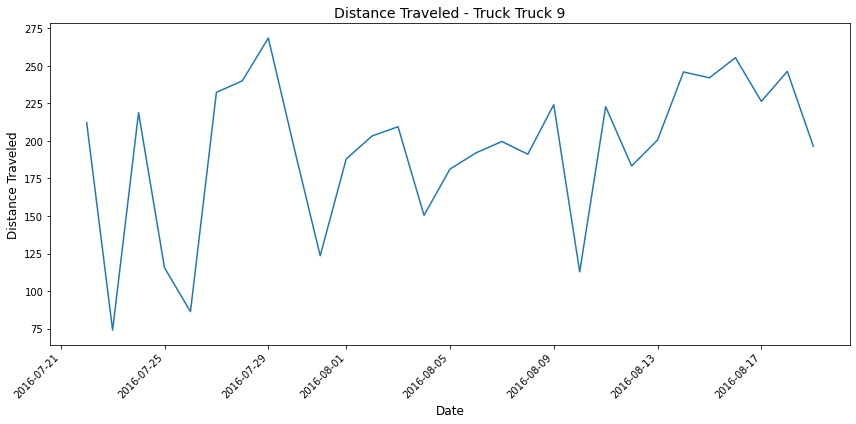

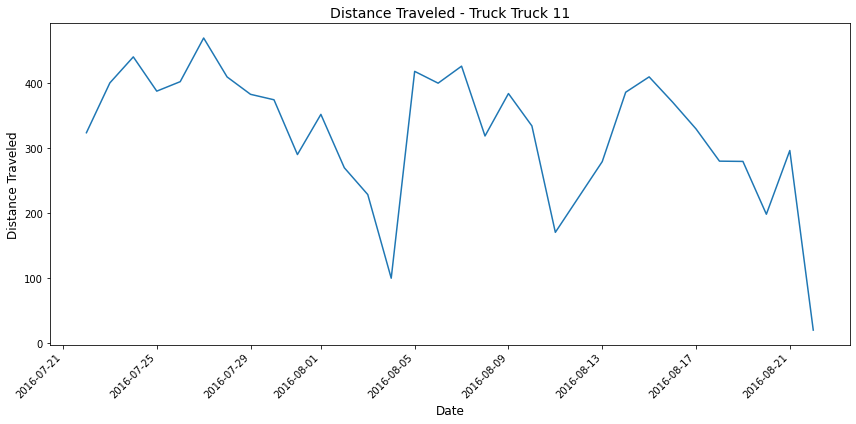

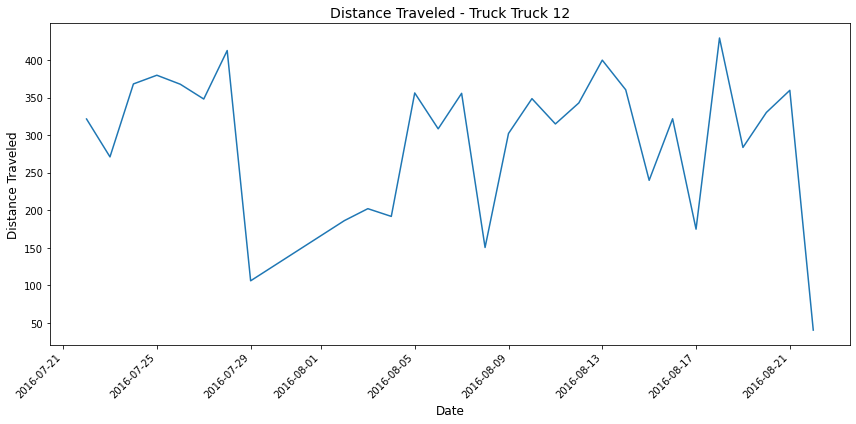

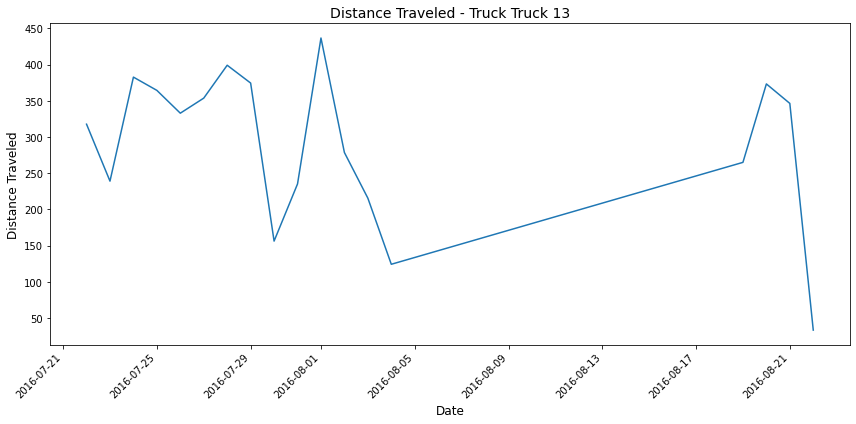

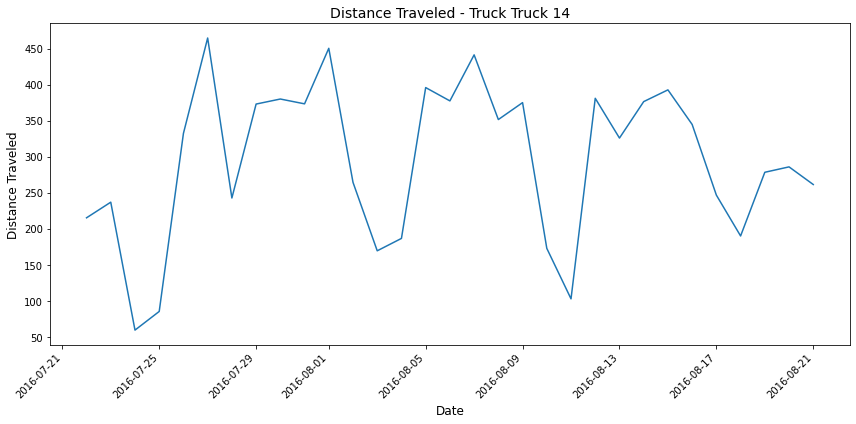

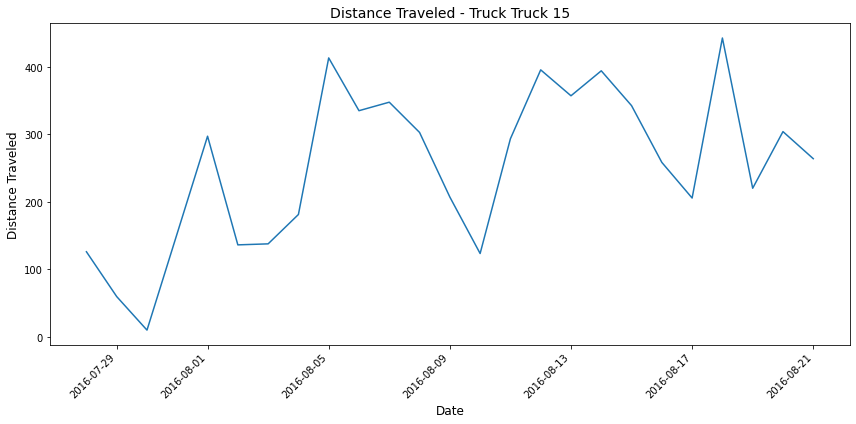

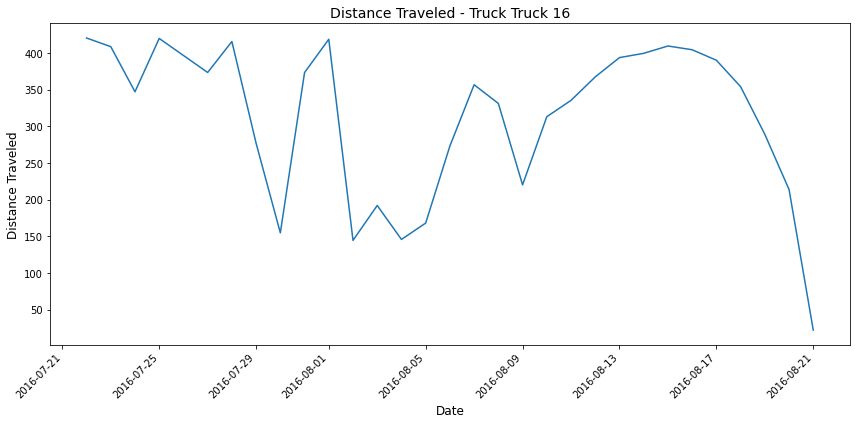

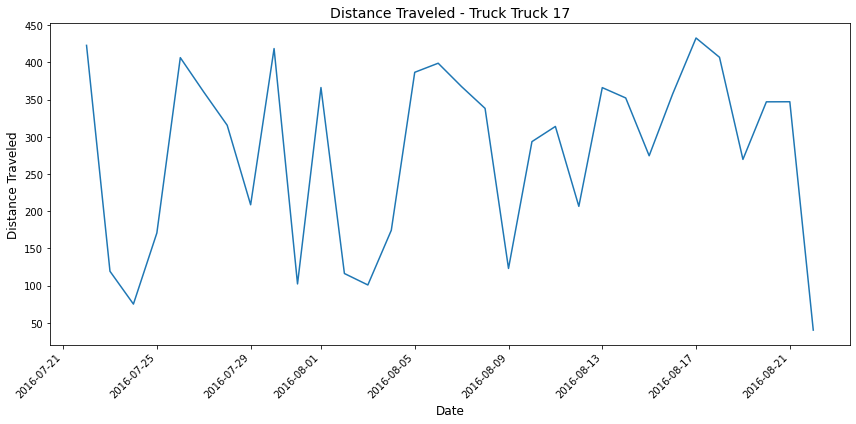

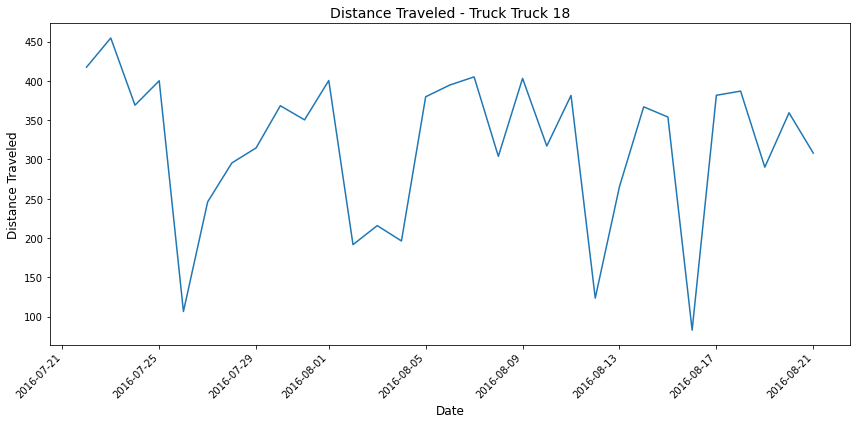

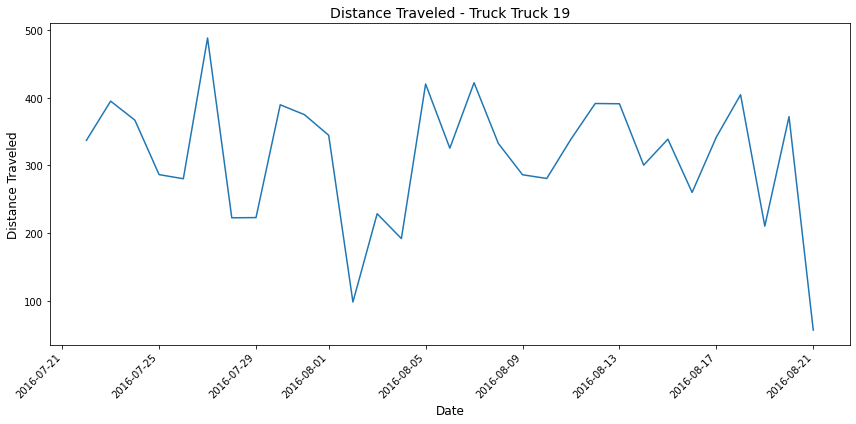

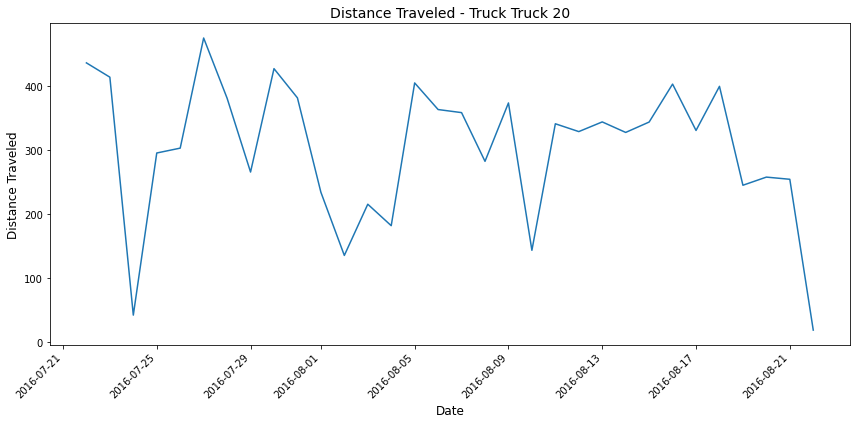

In [95]:
for truck in df['mach_ser_no'].unique():
    truck_data = df[df['mach_ser_no'] == truck]

    #Grouping the filtered data by 'ocur_ts_date' and calculate the sum of 'total_distance'
    distance_traveled = truck_data.groupby('ocur_ts_date')['total_distance'].sum()

    # Plot the line plot for the current truck
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=distance_traveled.index, y=distance_traveled.values)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Distance Traveled', fontsize=12)
    plt.title(f'Distance Traveled - Truck {truck}', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

In the above plots we can identify the distance of each trucks day to day.

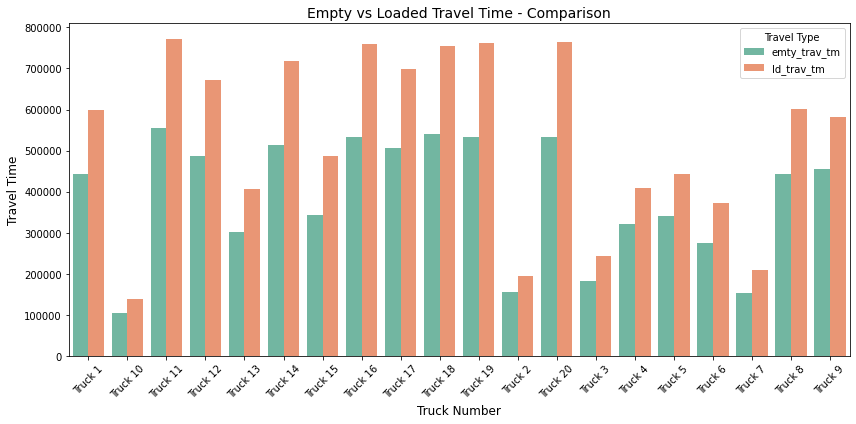

In [106]:
#Grouping the data by Truck no and calculating the sum of empty and loaded travel time
grouped_data = df.groupby('mach_ser_no')[['emty_trav_tm', 'ld_trav_tm']].sum()

#Reseting the index to make 'mach_ser_no' a regular column
grouped_data = grouped_data.reset_index()

#Melting the data to convert it into a long format
melted_data = pd.melt(grouped_data, id_vars='mach_ser_no', var_name='Travel Type', value_name='Travel Time')


#Ploting the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='mach_ser_no', y='Travel Time', hue='Travel Type', data=melted_data,palette='Set2')
plt.xlabel('Truck Number', fontsize=12)
plt.ylabel('Travel Time', fontsize=12)
plt.title('Empty vs Loaded Travel Time - Comparison', fontsize=14)
plt.xticks(rotation = 45,fontsize=10)
plt.legend(title='Travel Type')
plt.tight_layout()
plt.show()

Above graph shows that the empty distance travel is greater than loaded distance for each truck.

We need to optimize the empty distance travel if the route is constant so as to get good mileage.

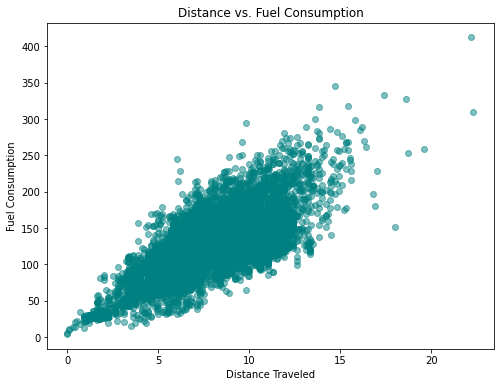

In [119]:
plt.figure(figsize=(8, 6))
plt.scatter(df['total_distance'], df['fuel_used_in_cyc'], color='Teal', alpha=0.5)
plt.xlabel('Distance Traveled')
plt.ylabel('Fuel Consumption')
plt.title('Distance vs. Fuel Consumption')
plt.show()

9.	Predict the future production capacity for each truck (Prediction & forecasting needs to be made for next 15 days)

In [130]:
df.columns

Index(['mach_ser_no', 'ocur_ts_date', 'ocur_ts_time', 'payld_wt', 'ld_tm',
       'emty_stop_tm', 'emty_trav_tm', 'emty_trav_dstnc', 'ld_stop_tm',
       'ld_trav_tm', 'ld_trav_dstnc', 'ld_pass_ct', 'fuel_used_in_cyc',
       'shft_ct', 'total_distance', 'miles', 'gear_shift_miles',
       'tons_per_gallon_per_distance', 'gear_shifts_per_mile',
       'fuel_efficiency'],
      dtype='object')

In [144]:
#We have to predict the production capacity that is 'payld_wt'
df1=pd.DataFrame()
df1['data'] = df['ocur_ts_date']
df1['capacity'] = df['payld_wt']
df1['truckid'] = df['mach_ser_no']

In [146]:
df1.head()

,data,capacity,truckid
0,2016-07-22,349.7,Truck 1
1,2016-07-22,336.5,Truck 1
2,2016-07-22,356.3,Truck 1
3,2016-07-22,343.1,Truck 1
4,2016-07-22,379.3,Truck 1


In [149]:
df1 = df1.set_index("data") # setting date as index
df1.head()

,capacity,truckid
data,,
2016-07-22,349.7,Truck 1
2016-07-22,336.5,Truck 1
2016-07-22,356.3,Truck 1
2016-07-22,343.1,Truck 1
2016-07-22,379.3,Truck 1


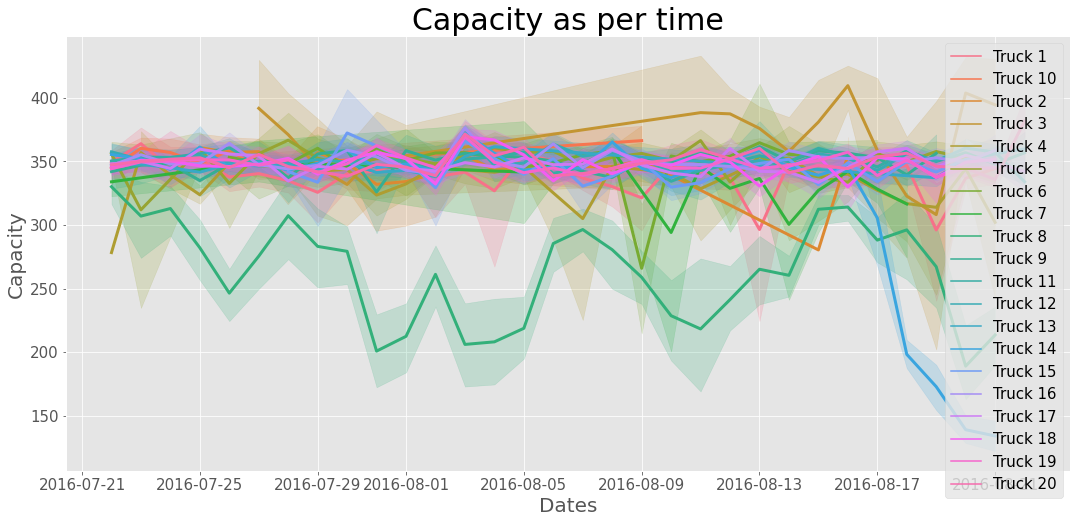

In [153]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Capacity', fontsize=20)
plt.yticks(fontsize=15)

sns.lineplot(data=df1, x=df1.index, y='capacity', hue='truckid', linewidth=3)

plt.title('Capacity as per time', fontsize=30)
plt.legend(fontsize=15)
plt.show()

<AxesSubplot: xlabel='capacity', ylabel='Density'>

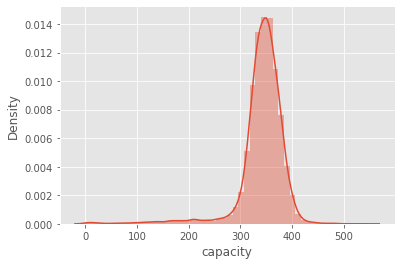

In [154]:
sns.distplot(df1['capacity'])

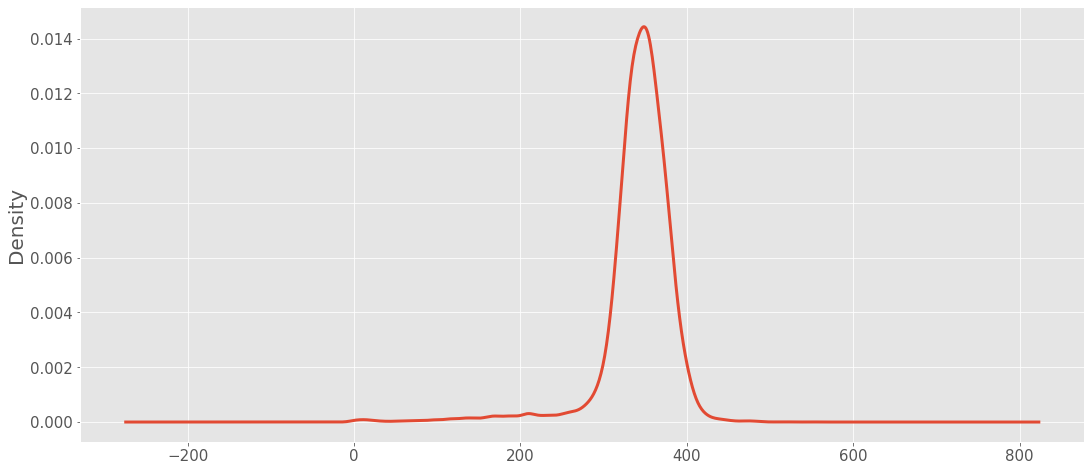

In [155]:
# Distribution of the capacity  
df_cap = df1['capacity'] 
df_cap.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

<Figure size 864x432 with 0 Axes>

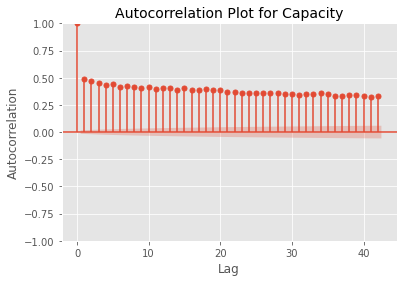

In [162]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df1['capacity'])
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Autocorrelation Plot for Capacity', fontsize=14)
plt.grid(True)
plt.show()

Pefroming ADFuller test

In [164]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df1['capacity'])

# Extract ADF test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

ADF Statistic: -7.187717584833801
p-value: 2.55097392683659e-10
Critical Values:
1%: -3.430792190199608
5%: -2.8617354287362704
10%: -2.5668740220345336


The ADF statistic is significantly lower than the critical values at all confidence levels (1%, 5%, and 10%). Additionally, the p-value is extremely small (close to zero). 

 These results suggest strong evidence against the null hypothesis of non-stationarity, indicating that the capacity series is likely stationary.
 
 In other words, the capacity series exhibits a stable pattern and does not have a unit root, which is a common characteristic of stationary time series data. This is a desirable property for many time series analysis techniques, as they often assume stationarity.

**Predicting using ARIMA model**

Auto-correlations

After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series.

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

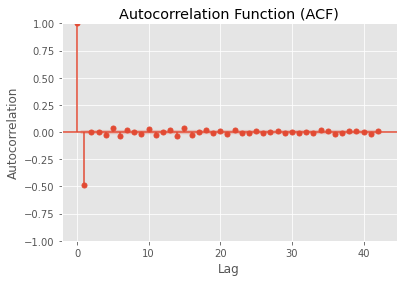

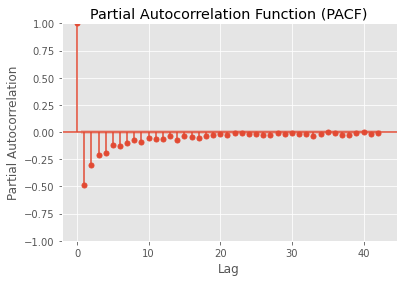

In [179]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF)
plot_acf(df1['capacity'].diff().dropna())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot the partial autocorrelation function (PACF)
plot_pacf(df1['capacity'].diff().dropna())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [187]:
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

#Defining the range of values for p, d, and q
p_values = range(0, 3)  # AR order
d_values = range(0, 2)  # Differencing order
q_values = range(0, 3)  # MA order

#function to evaluate the ARIMA model for a given order
def evaluate_arima_model(dataset, test, order):
    #Fit the ARIMA model
    model = ARIMA(dataset, order=order)
    model_fit = model.fit()

    # Make predictions
    forecast = model_fit.forecast(steps=len(test))

    # Calculate evaluation metric (e.g., root mean squared error)
    rmse = mean_squared_error(test, forecast, squared=False)

    return rmse

# function to evaluate different combinations of p, d, and q values
def evaluate_models(dataset, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

#function call
evaluate_models(train_data['capacity'], test_data['capacity'], p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=42.354
ARIMA(0, 0, 1) RMSE=42.365
ARIMA(0, 0, 2) RMSE=42.370
ARIMA(0, 1, 0) RMSE=57.593
ARIMA(0, 1, 1) RMSE=42.336
ARIMA(0, 1, 2) RMSE=42.353
ARIMA(1, 0, 0) RMSE=42.367
ARIMA(1, 0, 1) RMSE=42.369
ARIMA(1, 0, 2) RMSE=42.370
ARIMA(1, 1, 0) RMSE=47.076
ARIMA(1, 1, 1) RMSE=42.356
ARIMA(1, 1, 2) RMSE=42.334
ARIMA(2, 0, 0) RMSE=42.370
ARIMA(2, 0, 1) RMSE=42.370
ARIMA(2, 0, 2) RMSE=42.371
ARIMA(2, 1, 0) RMSE=45.490
ARIMA(2, 1, 1) RMSE=42.368
ARIMA(2, 1, 2) RMSE=42.365
Best ARIMA(1, 1, 2) RMSE=42.334


In [ ]:
##Best ARIMA(1, 1, 2) RMSE=42.334

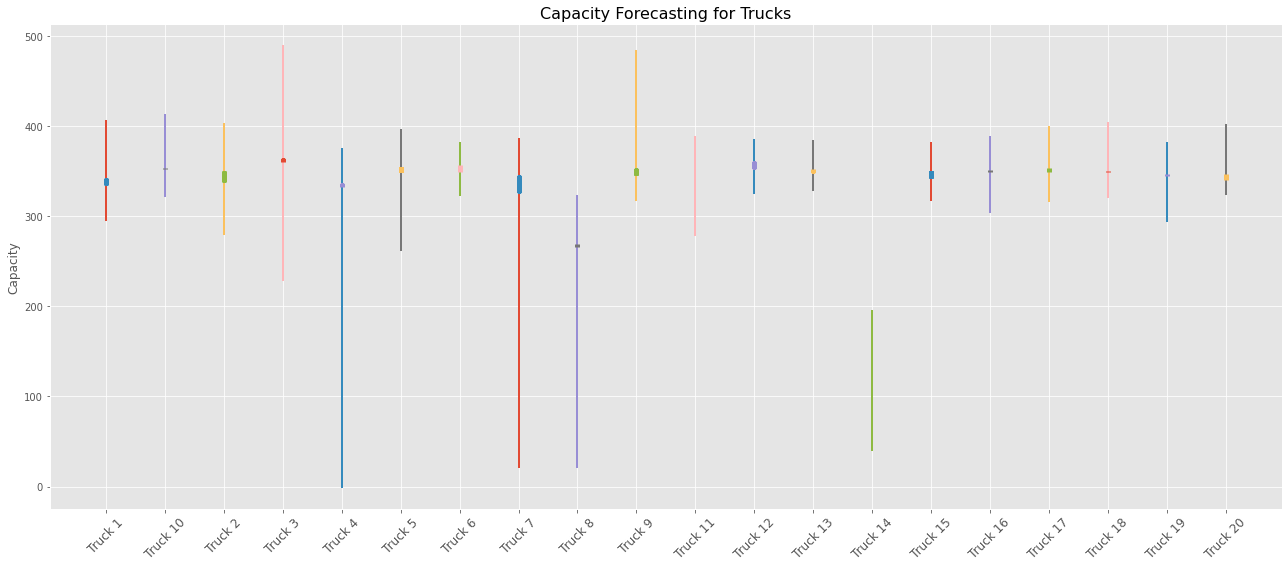

In [219]:
fig, ax = plt.subplots(figsize=(18, 8))

#Iterating over each truck number
for truck_number, truck_index in zip(truck_numbers, truck_indices):
    # Split the data for the current truck number
    truck_data = df1[df1['truckid'] == truck_number]
    train_data = truck_data[:-15]  # Use all data except the last 15 days for training
    test_data = truck_data[-15:]  # Use the last 15 days for testing

    #Fitting the ARIMA model with the best order (1,1,2)
    model = ARIMA(train_data['capacity'], order=(1, 1, 2))
    model_fit = model.fit()

    #Predicting future capacity for the next 15 days 
    forecast = model_fit.forecast(steps=15, alpha=0.05)

    #Convert truck index to numeric index for plotting
    truck_index_values = np.full_like(forecast, fill_value=truck_index)

    # Plot the true test close value and predictions on test data for the current truck number
    ax.plot(truck_index_values, test_data['capacity'], label=f'Truck {truck_number}', linewidth=2)
    ax.plot(truck_index_values, forecast, linestyle='dashed', linewidth=5)


plt.xticks(truck_indices, truck_numbers, fontsize=12, rotation=45)
plt.ylabel('Capacity', fontsize=12)
plt.grid(True)
plt.title('Capacity Forecasting for Trucks', fontsize=16)
plt.tight_layout()
plt.show()


In [261]:
#Creating a simple moving average model for each truck
models = {}
for truck_id in df1['truckid'].unique():
    models[truck_id] = train_data[train_data['truckid'] == truck_id]['capacity'].rolling(window=15, min_periods=1).mean()

#Predicting the capacity for the test set for each truck
predictions = {}
for truck_id in models:
    predictions[truck_id] = models[truck_id].iloc[-15:].reset_index(drop=True).values

#Converting the predictions and test data to DataFrames
predictions = pd.DataFrame(predictions)
test_data = pd.DataFrame(test_data)

In [262]:
predictions

,Truck 1,Truck 10,Truck 2,Truck 3,Truck 4,Truck 5,Truck 6,Truck 7,Truck 8,Truck 9,Truck 11,Truck 12,Truck 13,Truck 14,Truck 15,Truck 16,Truck 17,Truck 18,Truck 19,Truck 20
0,329.513333,348.806667,349.446667,396.593333,346.020000,357.140000,354.326667,329.900000,226.486667,338.886667,354.566667,358.426667,347.800000,122.126667,345.893333,352.906667,349.366667,345.993333,346.960000,332.406667
1,331.026667,347.146667,348.293333,397.493333,348.233333,355.060000,353.020000,329.960000,216.220000,341.560000,351.013333,359.800000,349.826667,116.193333,345.920000,352.180000,353.153333,347.013333,347.573333,333.533333
2,332.440000,349.660000,353.186667,412.766667,341.380000,352.886667,358.246667,332.920000,215.820000,343.873333,350.393333,358.393333,348.260000,114.933333,347.626667,353.140000,356.013333,349.186667,346.953333,330.213333
3,333.200000,349.873333,355.713333,409.640000,336.313333,350.100000,359.600000,332.793333,214.346667,344.900000,349.666667,360.153333,352.240000,117.940000,347.840000,355.080000,356.366667,352.200000,347.786667,329.046667
4,336.573333,350.806667,354.066667,416.226667,335.253333,342.886667,361.026667,341.413333,211.500000,345.193333,348.093333,358.626667,353.646667,114.013333,346.206667,357.026667,356.393333,352.940000,347.140000,329.706667
5,337.846667,348.880000,352.373333,413.486667,336.980000,343.260000,357.306667,343.640000,214.906667,347.580000,345.826667,357.693333,356.893333,117.180000,344.560000,359.693333,358.900000,352.893333,348.500000,326.366667
6,339.686667,349.653333,351.406667,417.640000,335.273333,344.073333,356.773333,349.386667,222.533333,349.780000,346.073333,360.646667,356.186667,124.840000,345.473333,356.340000,362.206667,349.640000,345.160000,328.033333
7,339.466667,353.160000,350.360000,414.346667,334.666667,343.393333,360.160000,348.160000,225.520000,359.613333,342.833333,362.500000,355.466667,126.440000,345.633333,356.660000,362.693333,349.186667,340.953333,328.000000
8,344.600000,357.593333,350.240000,412.226667,310.706667,343.240000,356.173333,343.480000,222.933333,360.520000,340.306667,360.926667,355.780000,130.180000,349.873333,354.233333,362.373333,348.926667,341.346667,329.246667
9,347.700000,358.840000,344.873333,406.666667,310.280000,344.046667,355.846667,342.626667,221.273333,359.366667,339.553333,359.413333,356.073333,131.826667,352.920000,351.453333,362.093333,350.680000,340.580000,334.993333


10.	Identify truck which has lowest and highest production prediction.

In [264]:
lowest_production_truck = predictions.idxmin(axis=1)
lowest_production_truck[0]

'Truck 14'

In [266]:
highest_production_truck = predictions.idxmax(axis=1)
highest_production_truck[0]

'Truck 3'

11.	Recommendation settings for each parameter to reduce fuel consumption.

1. Speed and Driving Behavior:

Maintain a moderate speed and avoid excessive speeding, particularly during acceleration and deceleration.

Practice smooth driving techniques, including gradual acceleration and deceleration, to optimize fuel efficiency.

Avoid aggressive driving behaviors such as rapid acceleration, hard braking, and abrupt lane changes.

2. Idle Time:

Minimize idling time as much as possible. Turn off the engine when the vehicle is stationary for an extended period.

Analyze the data to identify instances of prolonged idling and explore ways to reduce idle time, such as optimizing loading and unloading processes or implementing idle reduction technologies.

3. Payload Weight and Load Optimization:

Determine the optimal payload that maximizes efficiency without compromising operational requirements.

Consider implementing load optimization strategies to minimize unnecessary weight and maximize payload efficiency.

4. Driving Route and Traffic Optimization:

Utilize data on total distance, miles, and gear shift miles to identify driving routes that minimize fuel consumption.

Leverage real-time traffic information and route planning tools to avoid congested routes, roadblocks, or construction sites, reducing the need for frequent stops and starts.

5. Vehicle Maintenance and Performance:

Regularly service and maintain vehicles to ensure they are operating at their peak efficiency.

Monitor fuel usage in relation to factors such as engine tune-ups, air filter replacements, and oil changes. Identify any patterns or deviations that may indicate maintenance issues affecting fuel consumption.

Keep tires properly inflated and ensure they are in good condition to minimize rolling resistance.

6. Fuel Management:

Track fuel usage in relation to specific driving conditions and factors such as shift count, empty travel time, loaded travel time, and loaded pass count.

Analyze fuel consumption trends based on these variables to identify opportunities for optimization, such as optimizing shift patterns or reducing empty travel time.